In [9]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn import metrics

In [3]:
os.chdir(r'C:\Users\fizzza\Desktop\data mining')
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'sample_submission.csv')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
X = train.drop(['reordered'],axis=1)
Y = train['reordered']

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)

In [7]:

clf = RFE(RandomForestClassifier(max_features = 'auto', criterion = 'gini', bootstrap = True,n_estimators = 50,min_samples_split = 2), 10, step=1)
#clf = RandomForestClassifier(n_estimators = 15, criterion = 'gini', min_samples_split = 3)
clf.fit(X_train,Y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=50, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False),
    n_features_to_select=10, step=1, verbose=0)

In [10]:
y_predict = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)
y_pred_prob = y_pred_prob[:,1]
print(accuracy_score(Y_test,y_predict))
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,y_predict))
print(classification_report(Y_test,y_predict))
print(metrics.roc_auc_score(Y_test, y_pred_prob))

0.8305111111111111
[[28647  8294]
 [ 6960 46099]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     36941
           1       0.85      0.87      0.86     53059

    accuracy                           0.83     90000
   macro avg       0.83      0.82      0.82     90000
weighted avg       0.83      0.83      0.83     90000

0.9132061088410051


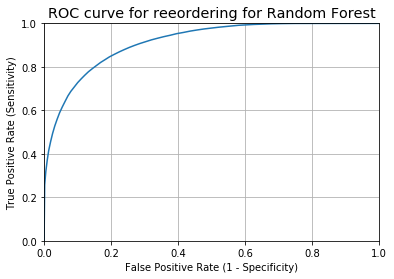

In [11]:

fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for reeordering for Random Forest')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [45]:
from sklearn.model_selection import validation_curve
X = X_train.to_numpy()
Y = Y_train.to_numpy()
train_scores, valid_scores = validation_curve(RandomForestClassifier(), X, Y, "n_estimators",np.arange(8,20, 2),cv=5)


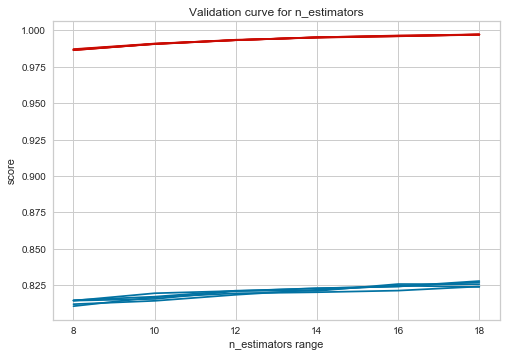

In [59]:
plt.plot(np.arange(8,20,2),train_scores,'r')
plt.plot(np.arange(8,20,2),valid_scores,'b')
plt.title('Validation curve for n_estimators')
plt.xlabel('n_estimators range')
plt.ylabel('score')
plt.show()

In [55]:
from sklearn.model_selection import validation_curve
X = X_train.to_numpy()
Y = Y_train.to_numpy()
train_scores_1, valid_scores_1 = validation_curve(RandomForestClassifier(), X, Y, "min_samples_split",np.arange(2,10,1),cv=5)


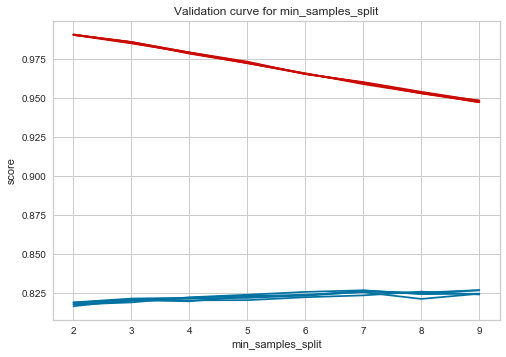

In [60]:
plt.plot(np.arange(2,10,1),train_scores_1,'r')
plt.plot(np.arange(2,10,1),valid_scores_1,'b')
plt.title('Validation curve for min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('score')
plt.show()